In [ ]:
%config InlineBackend.figure_format = 'retina'

# Testing Enviornment

In [ ]:
import pandas as pd
import numpy as np

## Running tests

The following section unit-tests most of the code written for the proof of concept prototype.

In [ ]:
%run ../test/test_algorithms.py

In [ ]:
%run ../test/test_dataloader.py

In [ ]:
%run ../test/test_predictorsI.py

In [ ]:
%run ../test/test_predictorsII.py

## Running example of the system

In [ ]:
%run ../consensus/algorithms.py

In [ ]:
%run ../tools/dataloader.py

In [ ]:
test = DataLoader('aapl', '2009-01-01', '2010-02-10')

In [ ]:
prices = test.get_close()

In [ ]:
prices

In [ ]:
#prices = np.array(prices)
#len(prices)

In [ ]:
prices

In [ ]:
%run ../tools/predictorsI.py

In [ ]:
op0 = BasicUnivariatePredictor(prices, 25, 7)
op1 = BasicUnivariatePredictor(prices, 25, 7)
op2 = BasicUnivariatePredictor(prices, 25, 7)
op3 = BasicUnivariatePredictor(prices, 25, 7)

In [ ]:
op0.create_bilstm()

In [ ]:
op0.model_blueprint()

In [ ]:
op0.fit_model(10)

In [ ]:
op0.show_performance()

In [ ]:
oyea = prices[-26:-1]
#oyea = X[-1]
#oyea

In [ ]:
nice = op0.predict(oyea)
nice

In [ ]:
op1.create_lstm()

In [ ]:
op1.model_blueprint()

In [ ]:
op1.fit_model(10)

In [ ]:
op1.show_performance()

In [ ]:
nice = op1.predict(oyea)
nice

In [ ]:
op2.create_cnn()

In [ ]:
op2.model_blueprint()

In [ ]:
op2.fit_model(10)

In [ ]:
op2.show_performance()

In [ ]:
nice = op2.predict(oyea)
nice

In [ ]:
op3.create_mlp()

In [ ]:
op3.model_blueprint()

In [ ]:
op3.fit_model(100)

In [ ]:
op3.show_performance()

In [ ]:
oyea = prices[-26:-1]
#oyea = X[-1]
#oyea

In [ ]:
nice = op3.predict(oyea)
nice

In [ ]:
%run ../tools/predictorsII.py

In [ ]:
oo = UnivariatePredictorII(prices, 7)

In [ ]:
oo.fit_neural_model(100,"D")

In [ ]:
oo.show_performance_neural()

In [ ]:
oo.predict_neural()

In [ ]:
oo.fit_prophet_model()

In [ ]:
oo.show_performance_prophet()

In [ ]:
oo.predict_prophet()

In [ ]:
%run ../tools/predictorsIII.py

In [ ]:
len(prices)

In [ ]:
op4 = HybridUnivariatePredictor(prices,2, 24, 7)

In [ ]:
op4.create_cnnlstm()

In [ ]:
op4.model_blueprint()

In [ ]:
op4.fit_model(10)

In [ ]:
op4.show_performance()

In [ ]:
oyea = prices[-25:-1]
#oyea = X[-1]
#oyea

In [ ]:
nice = op4.predict(oyea)
nice
#noice = pd.DataFrame(nice, columns=['yea'])
#noice = nice.reshape(20, 1)
#noice = pd.DataFrame(noice, columns=['yea'])

In [ ]:
nice.plot()

## First whole system test - I am alive

In [ ]:
%run ../consensus/algorithms.py
%run ../tools/dataloader.py
%run ../tools/predictorsI.py
%run ../tools/predictorsII.py
%run ../tools/predictorsIII.py

In [1]:
%run ../tools/dataloader.py
%run ../system/activate.py

In [2]:
training = DataLoader('aapl', '2009-01-01', '2010-05-01')

In [3]:
training = training.get_close()

In [4]:
predict = DataLoader('aapl', '2010-06-01', '2010-09-01')

In [5]:
predict = predict.get_close()

In [6]:
predict_req, real = data_prep(predict, 24, 30)

Epoch 1/10
23/23 [==============================] - 0s 21ms/step - loss: 29.9469 - mean_squared_error: 29.9469 - val_loss: 40.6480 - val_mean_squared_error: 40.6480
Epoch 2/10
23/23 [==============================] - 0s 7ms/step - loss: 16.1184 - mean_squared_error: 16.1184 - val_loss: 21.6994 - val_mean_squared_error: 21.6994
Epoch 3/10
23/23 [==============================] - 0s 5ms/step - loss: 10.0917 - mean_squared_error: 10.0917 - val_loss: 13.6045 - val_mean_squared_error: 13.6045
Epoch 4/10
23/23 [==============================] - 0s 5ms/step - loss: 5.9777 - mean_squared_error: 5.9777 - val_loss: 7.7834 - val_mean_squared_error: 7.7834
Epoch 5/10
23/23 [==============================] - 0s 5ms/step - loss: 3.1661 - mean_squared_error: 3.1661 - val_loss: 3.7502 - val_mean_squared_error: 3.7502
Epoch 6/10
23/23 [==============================] - 0s 5ms/step - loss: 1.3443 - mean_squared_error: 1.3443 - val_loss: 1.4949 - val_mean_squared_error: 1.4949
Epoch 7/10
23/23 [=========

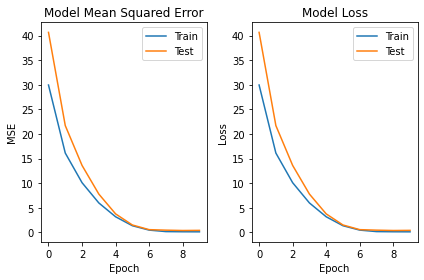

Epoch 1/10
23/23 [==============================] - 1s 41ms/step - loss: 27.1052 - mean_squared_error: 27.1052 - val_loss: 31.9571 - val_mean_squared_error: 31.9571
Epoch 2/10
23/23 [==============================] - 0s 20ms/step - loss: 11.7886 - mean_squared_error: 11.7886 - val_loss: 8.9317 - val_mean_squared_error: 8.9317
Epoch 3/10
23/23 [==============================] - 0s 20ms/step - loss: 2.1658 - mean_squared_error: 2.1658 - val_loss: 1.0455 - val_mean_squared_error: 1.0455
Epoch 4/10
23/23 [==============================] - 0s 17ms/step - loss: 0.2980 - mean_squared_error: 0.2980 - val_loss: 0.6269 - val_mean_squared_error: 0.6269
Epoch 5/10
23/23 [==============================] - 0s 18ms/step - loss: 0.1754 - mean_squared_error: 0.1754 - val_loss: 0.5324 - val_mean_squared_error: 0.5324
Epoch 6/10
23/23 [==============================] - 0s 17ms/step - loss: 0.1359 - mean_squared_error: 0.1359 - val_loss: 0.5895 - val_mean_squared_error: 0.5895
Epoch 7/10
23/23 [==========

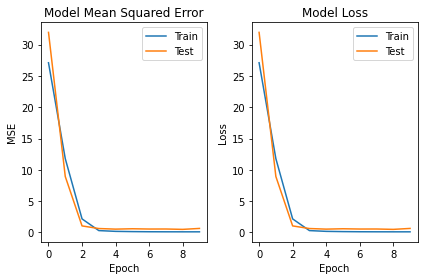

Epoch 1/10
23/23 [==============================] - 0s 9ms/step - loss: 27.2973 - mean_squared_error: 27.2973 - val_loss: 29.1849 - val_mean_squared_error: 29.1849
Epoch 2/10
23/23 [==============================] - 0s 3ms/step - loss: 9.9883 - mean_squared_error: 9.9883 - val_loss: 7.5163 - val_mean_squared_error: 7.5163
Epoch 3/10
23/23 [==============================] - 0s 3ms/step - loss: 2.0688 - mean_squared_error: 2.0688 - val_loss: 1.0602 - val_mean_squared_error: 1.0602
Epoch 4/10
23/23 [==============================] - 0s 3ms/step - loss: 0.2404 - mean_squared_error: 0.2404 - val_loss: 0.3723 - val_mean_squared_error: 0.3723
Epoch 5/10
23/23 [==============================] - 0s 4ms/step - loss: 0.1179 - mean_squared_error: 0.1179 - val_loss: 0.3954 - val_mean_squared_error: 0.3954
Epoch 6/10
23/23 [==============================] - 0s 3ms/step - loss: 0.1083 - mean_squared_error: 0.1083 - val_loss: 0.3397 - val_mean_squared_error: 0.3397
Epoch 7/10
23/23 [==================

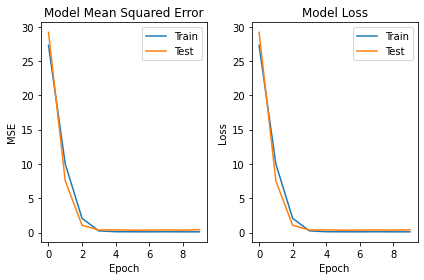

In [7]:
final_df = individual_predictors(training, predict_req, 30)

In [8]:
final_df

,CNN-LSTM,Bidirectional LSTM,CNN
0,8.557718,8.137953,9.665779
1,8.680736,7.486281,9.784231
2,8.681417,8.299031,9.636423
3,9.357290,7.737453,9.803885
4,9.264003,7.971705,9.759350
5,8.369270,6.799239,9.648529
6,8.448533,8.166894,9.795364
7,9.570391,7.908638,10.159645
8,9.695210,7.707533,9.982141
9,8.539060,8.667313,9.898425


In [ ]:
#final_df = pd.concat([A, B, C], axis=1)

### System Disagreement

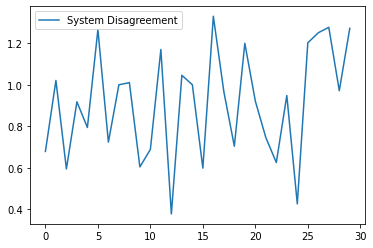

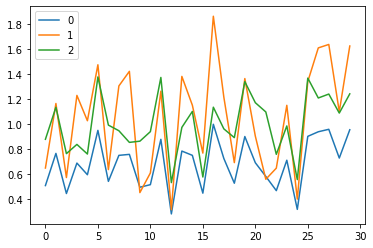

In [9]:
system_disagreement(final_df)

In [10]:
disagreement(final_df)

,System Disagreement
0,0.679034
1,1.021311
2,0.594396
3,0.918415
4,0.794509
5,1.266351
6,0.723765
7,1.000448
8,1.010937
9,0.604162


In [11]:
predictor_score(final_df)

,0,1,2
0,0.509275,0.649197,0.878629
1,0.765983,1.164135,1.133815
2,0.445797,0.573259,0.764133
3,0.688811,1.228757,0.837676
4,0.595881,1.026647,0.760997
5,0.949763,1.473107,1.376183
6,0.542823,0.636703,0.991767
7,0.750336,1.304254,0.946754
8,0.758203,1.420762,0.853847
9,0.495873,0.453122,0.863493


### System consensus

In [12]:
algos = consensus(final_df, real)

In [13]:
algos

,Average,NoMemory,Memory,Focus,Anchor
0,8.787150,8.787150,8.787150,8.787150,8.985819
1,8.650416,8.640235,8.645325,8.680736,8.720578
2,8.872290,8.993724,8.902489,9.636423,9.019880
3,8.966209,9.117800,9.077355,9.803885,9.051669
4,8.998353,9.265206,9.124888,9.264003,9.108880
5,8.272346,8.540991,8.459137,8.369270,8.455684
6,8.803597,8.942937,8.874049,8.448533,9.011620
7,9.212891,9.254999,9.389666,9.570391,9.249310
8,9.128295,9.160189,9.310444,9.695210,9.095813
9,9.034932,9.021246,9.045091,8.539060,9.101313


In [15]:
ui

,CNN-LSTM,Bidirectional LSTM,CNN,Real Value,Average,NoMemory,Memory,Focus,Anchor
Date,,,,,,,,,
2010-07-06,8.557718,8.137953,9.665779,8.879643,8.787150,8.787150,8.787150,8.787150,8.985819
2010-07-07,8.680736,7.486281,9.784231,9.238214,8.650416,8.640235,8.645325,8.680736,8.720578
2010-07-08,8.681417,8.299031,9.636423,9.217500,8.872290,8.993724,8.902489,9.636423,9.019880
2010-07-09,9.357290,7.737453,9.803885,9.272143,8.966209,9.117800,9.077355,9.803885,9.051669
2010-07-12,9.264003,7.971705,9.759350,9.188929,8.998353,9.265206,9.124888,9.264003,9.108880
2010-07-13,8.369270,6.799239,9.648529,8.992857,8.272346,8.540991,8.459137,8.369270,8.455684
2010-07-14,8.448533,8.166894,9.795364,9.026071,8.803597,8.942937,8.874049,8.448533,9.011620
2010-07-15,9.570391,7.908638,10.159645,8.980357,9.212891,9.254999,9.389666,9.570391,9.249310
2010-07-16,9.695210,7.707533,9.982141,8.925000,9.128295,9.160189,9.310444,9.695210,9.095813


In [14]:
ui = combined_frame(algos, final_df, real)

In [16]:
mse_score(ui)

([0.22055282492947298, 1.5984719107909162, 0.9386878639991665],
 [0.11088224528395131,
  0.14662349934837812,
  0.1054620654915714,
  0.4241057582400479,
  0.09245268076807465])

In [17]:
mse_log_score(ui)

([0.0021746932803951543, 0.01837184094456727, 0.008311294208200974],
 [0.0011118167486218438,
  0.0014729435676565854,
  0.0010426082860950604,
  0.004450677173469113,
  0.0009125995021184303])

In [18]:
mae_score(ui)

([0.40992463429768883, 1.1193917274475098, 0.924848206837972],
 [0.28620535532633495,
  0.30442885131684566,
  0.2809812606188363,
  0.5313056892818875,
  0.2539586141864844])

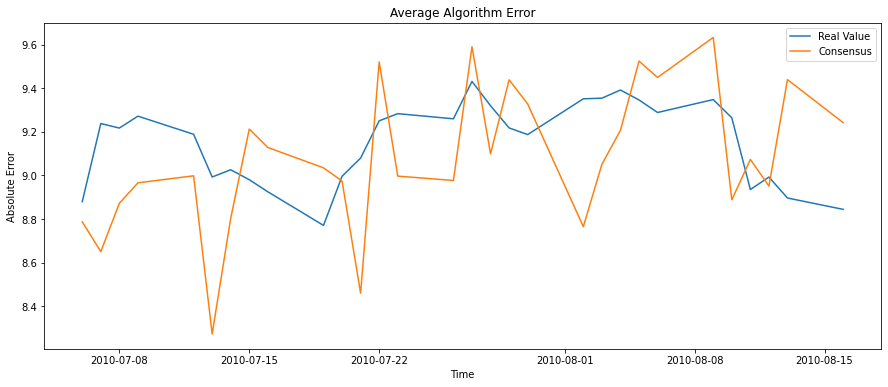

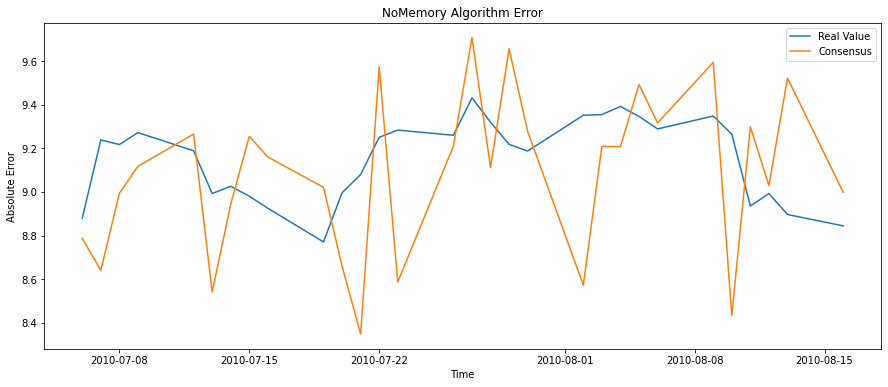

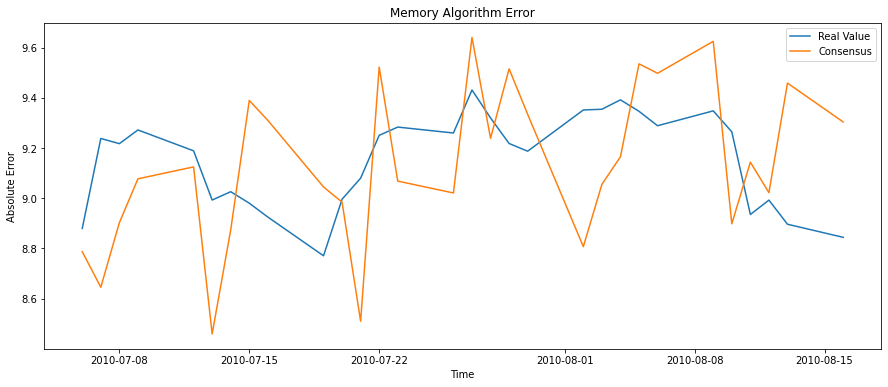

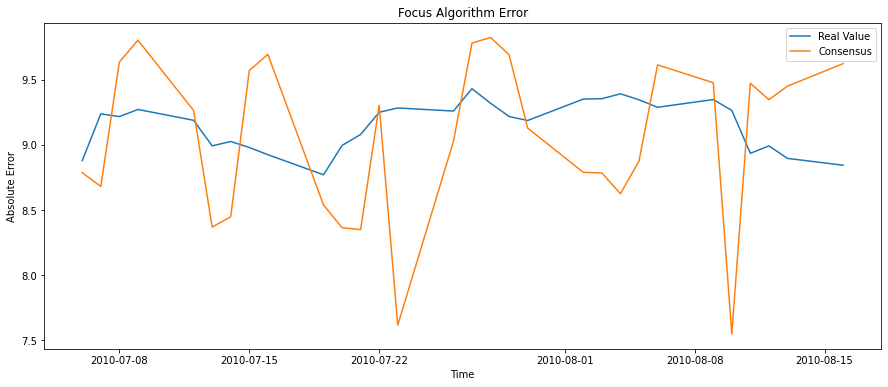

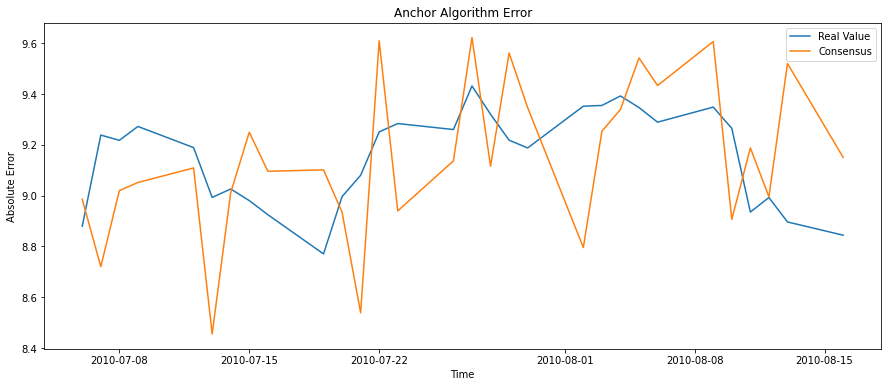

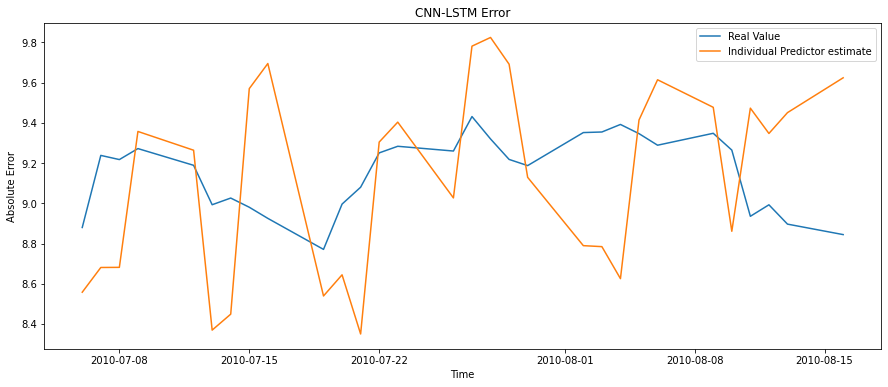

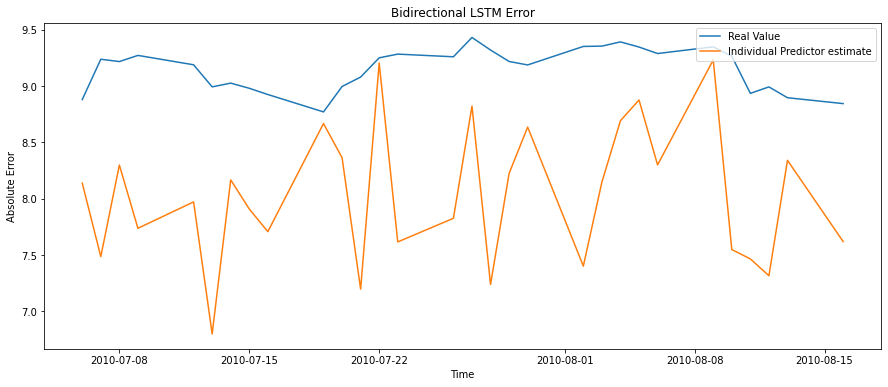

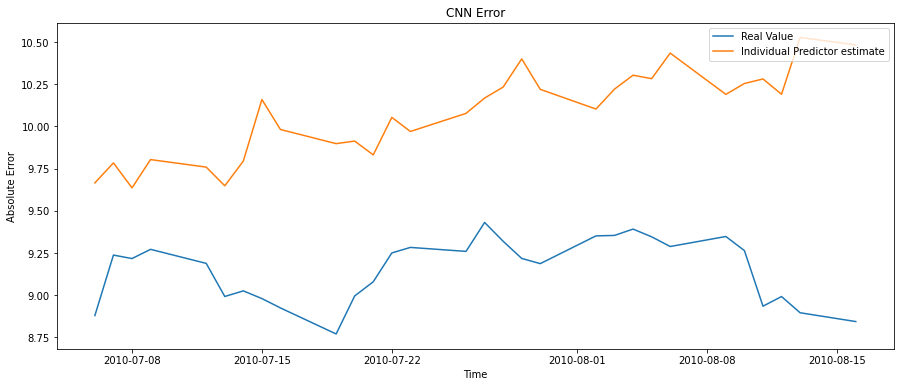

In [19]:
plot_performance(ui)